In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats

In [2]:
raw_data = pd.read_csv("train.csv")
raw_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


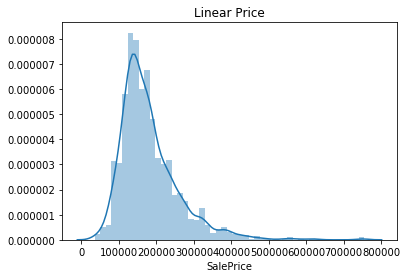

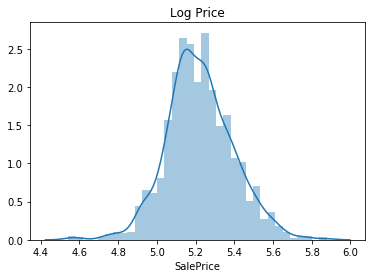

In [3]:
sns.distplot(raw_data['SalePrice'])
plt.title('Linear Price')
plt.show()

sns.distplot(np.log10(raw_data['SalePrice']))
plt.title('Log Price')
plt.show()

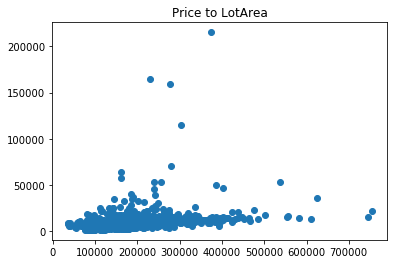

Low relation


In [4]:
plt.scatter(raw_data['SalePrice'],raw_data['LotArea'])
plt.title("Price to LotArea")
plt.show()
print("Low relation")

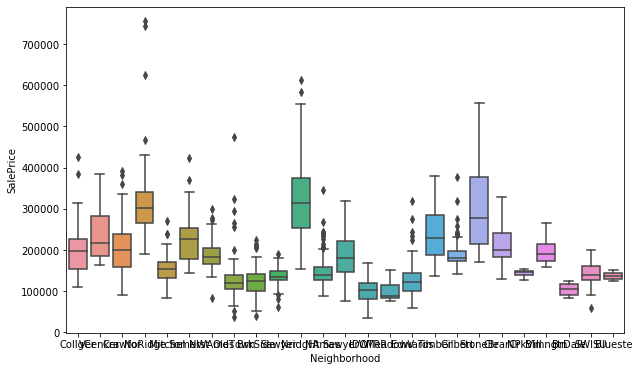

Medium influence from neighborhood


In [5]:
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x='Neighborhood', y="SalePrice", data=raw_data)
plt.show()
print("Medium influence from neighborhood")

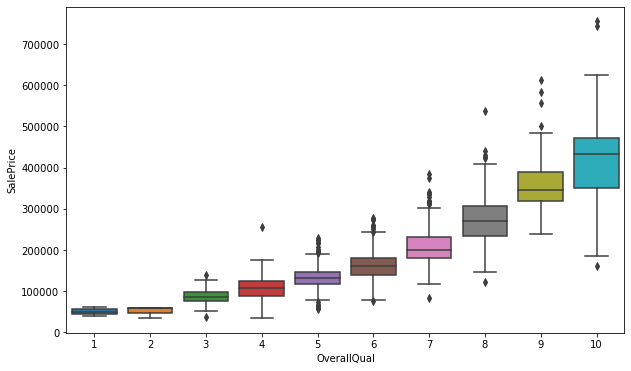

High Influence


In [6]:
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=raw_data)
plt.show()
print("High Influence")

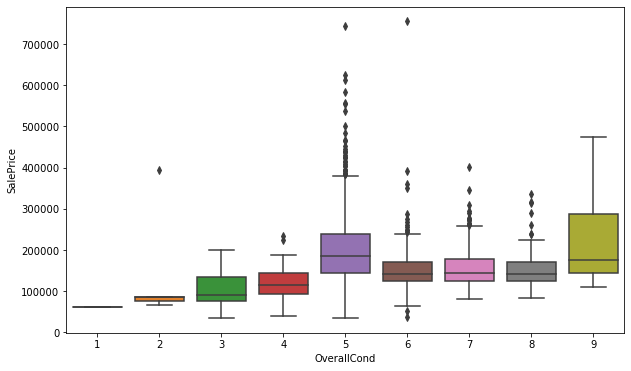

Little Influence


In [7]:
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x='OverallCond', y="SalePrice", data=raw_data)
plt.show()
print("Little Influence")

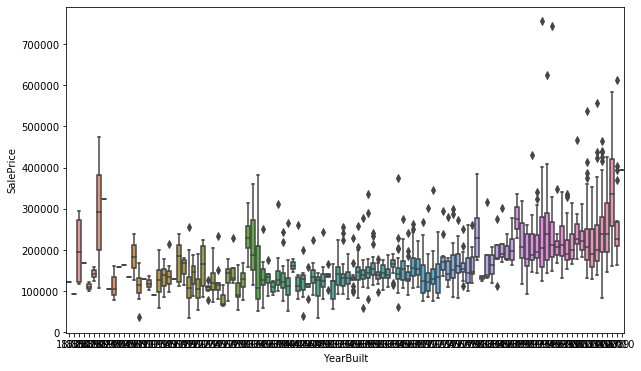

Little Influence, uncleaned


In [8]:
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=raw_data)
plt.show()
print("Little Influence, uncleaned")

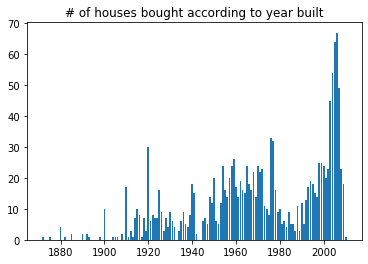

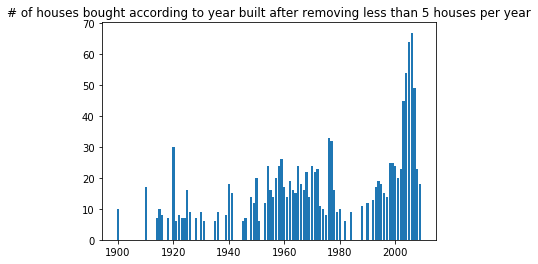

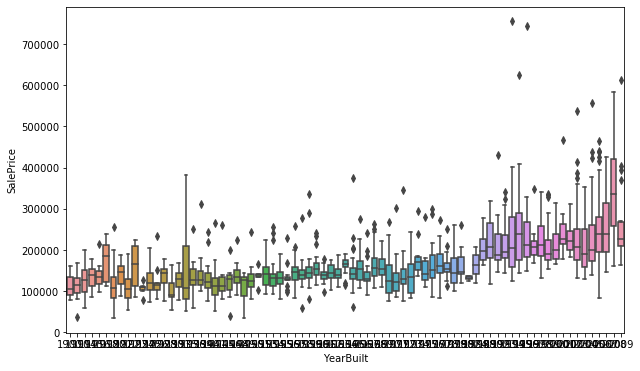

Low Influence and a clear upward trend


In [9]:
plt.bar(raw_data['YearBuilt'].value_counts().index,raw_data['YearBuilt'].value_counts().values)
plt.title('# of houses bought according to year built')
plt.show()

treshold = 5
valid_years = raw_data['YearBuilt'].value_counts()[raw_data['YearBuilt'].value_counts()>treshold].index
valid_houses = raw_data['YearBuilt'][raw_data['YearBuilt'].isin(valid_years)]

plt.bar(valid_houses.value_counts().index,valid_houses.value_counts().values)
plt.title('# of houses bought according to year built after removing less than 5 houses per year')
plt.show()

f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=raw_data[raw_data['YearBuilt'].isin(valid_years)])
plt.show()
print("Low Influence and a clear upward trend")

High Influence


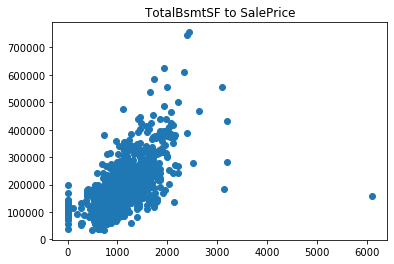

In [10]:
plt.scatter(raw_data['TotalBsmtSF'],raw_data['SalePrice'])
plt.title('TotalBsmtSF to SalePrice')
print('High Influence')

Medium Influence


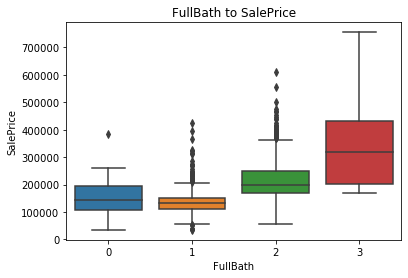

In [11]:
sns.boxplot(raw_data['FullBath'],raw_data['SalePrice'])
plt.title('FullBath to SalePrice')
print('Medium Influence')

Low Influence


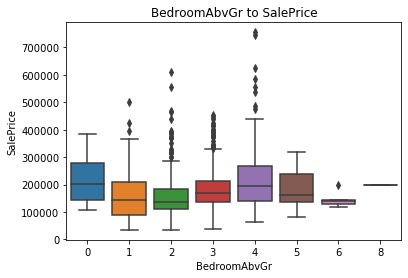

In [12]:
sns.boxplot(raw_data['BedroomAbvGr'],raw_data['SalePrice'])
plt.title('BedroomAbvGr to SalePrice')
print('Low Influence')
# raw_data.columns.values

High Influence


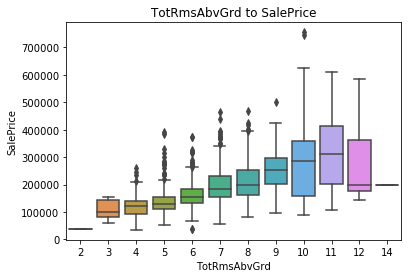

In [13]:
sns.boxplot(raw_data['TotRmsAbvGrd'],raw_data['SalePrice'])
plt.title('TotRmsAbvGrd to SalePrice')
print('High Influence')

Almost no pools


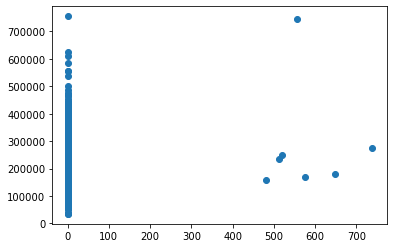

In [14]:
plt.scatter(raw_data['PoolArea'],raw_data['SalePrice'])
print('Almost no pools')

Medium/high relation


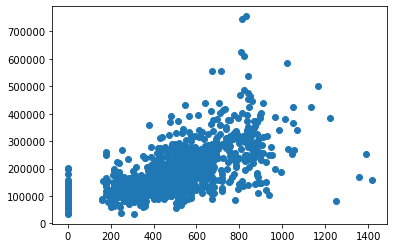

In [15]:
plt.scatter(raw_data['GarageArea'],raw_data['SalePrice'])
print('Medium/high relation')

High relation


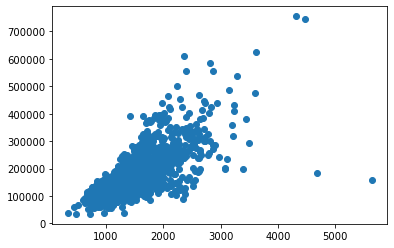

In [16]:
plt.scatter(raw_data['GrLivArea'],raw_data['SalePrice'])
print('High relation')

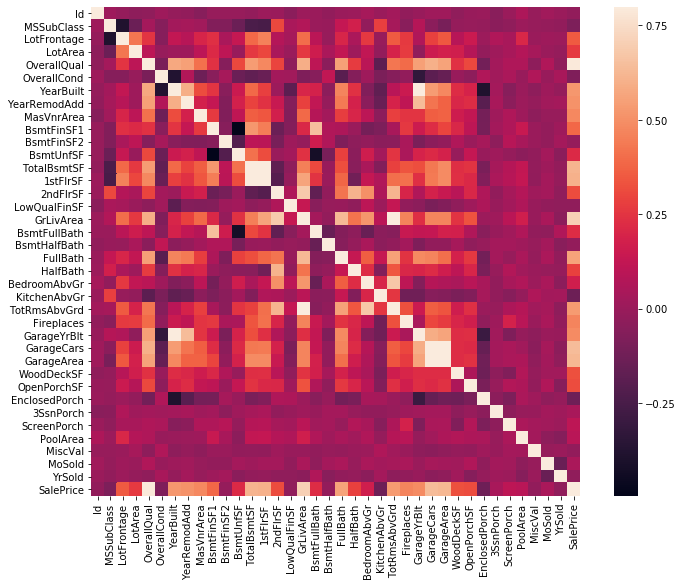

In [17]:
corrmat = raw_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

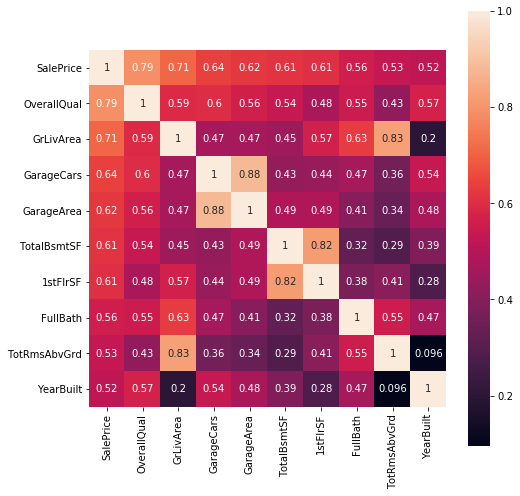

In [18]:
top_features = corrmat['SalePrice'].nlargest(10).sort_values(ascending=False).index
top_mat = raw_data[top_features].corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(top_mat, square=True,annot=True);

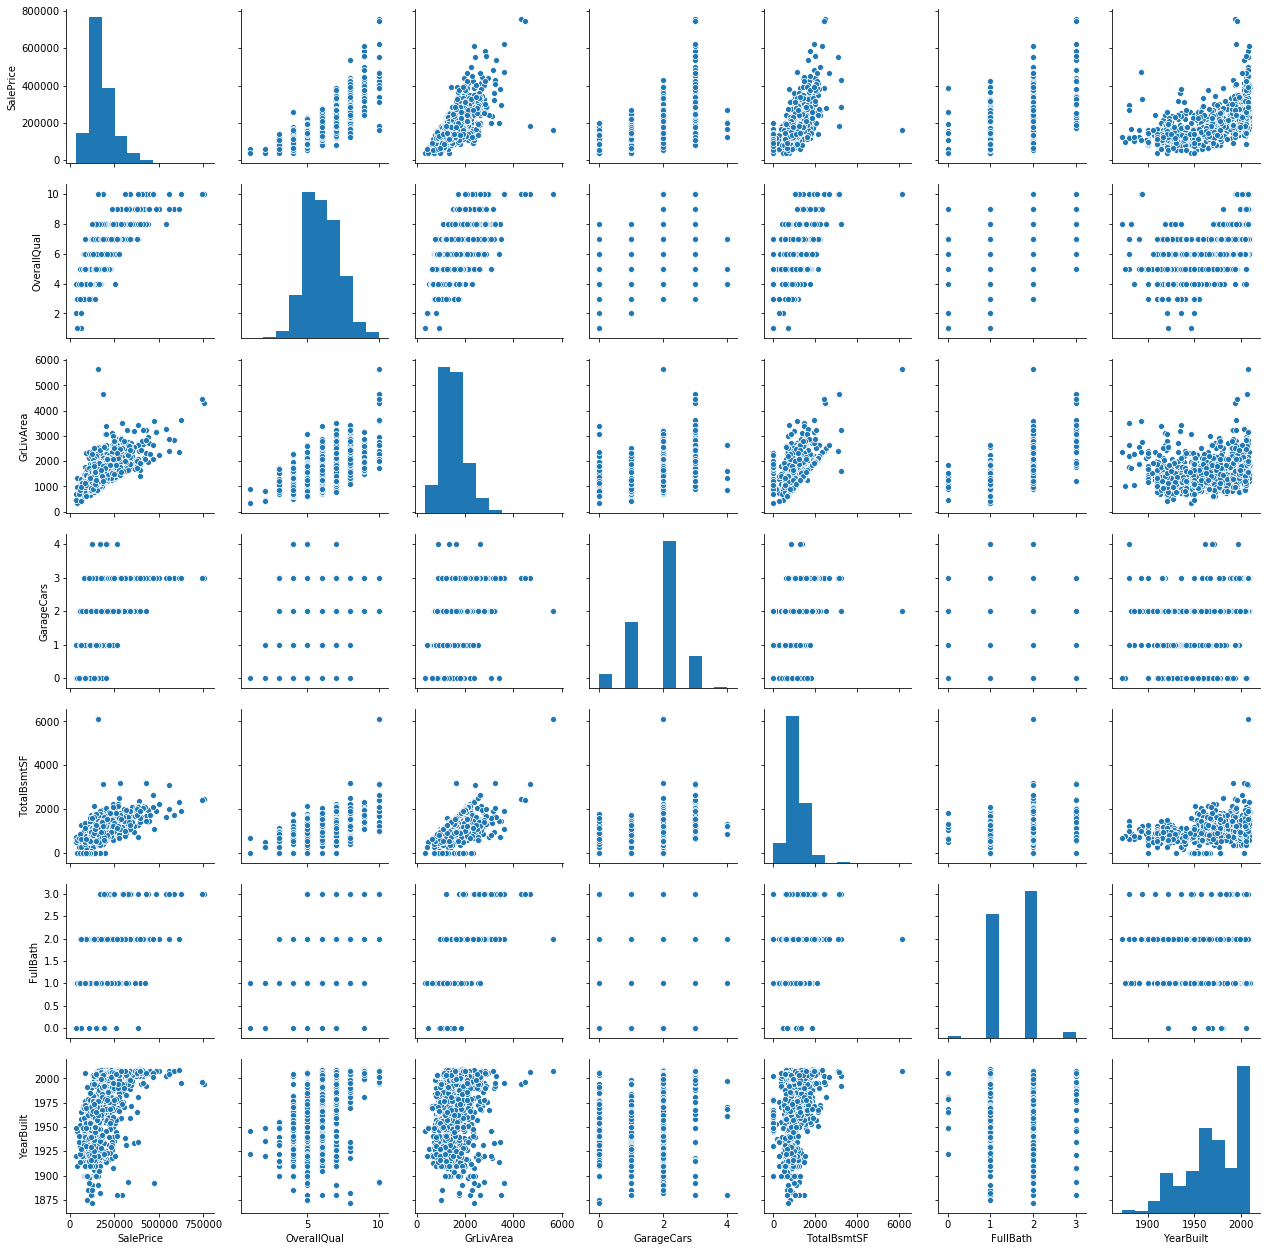

In [19]:
#Notes
#Garage area is highly correlated to GarageCars, so we will keep garage cars
#TotalBsmtSF is highly correlated to 1stFLrSF, so we'll only keep Total...
# GrLivArea is highly correlated to TotRmsAbvGrd, so we'll only keep Gr

main_features = ['SalePrice','OverallQual', 'GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(raw_data[main_features])
plt.show()

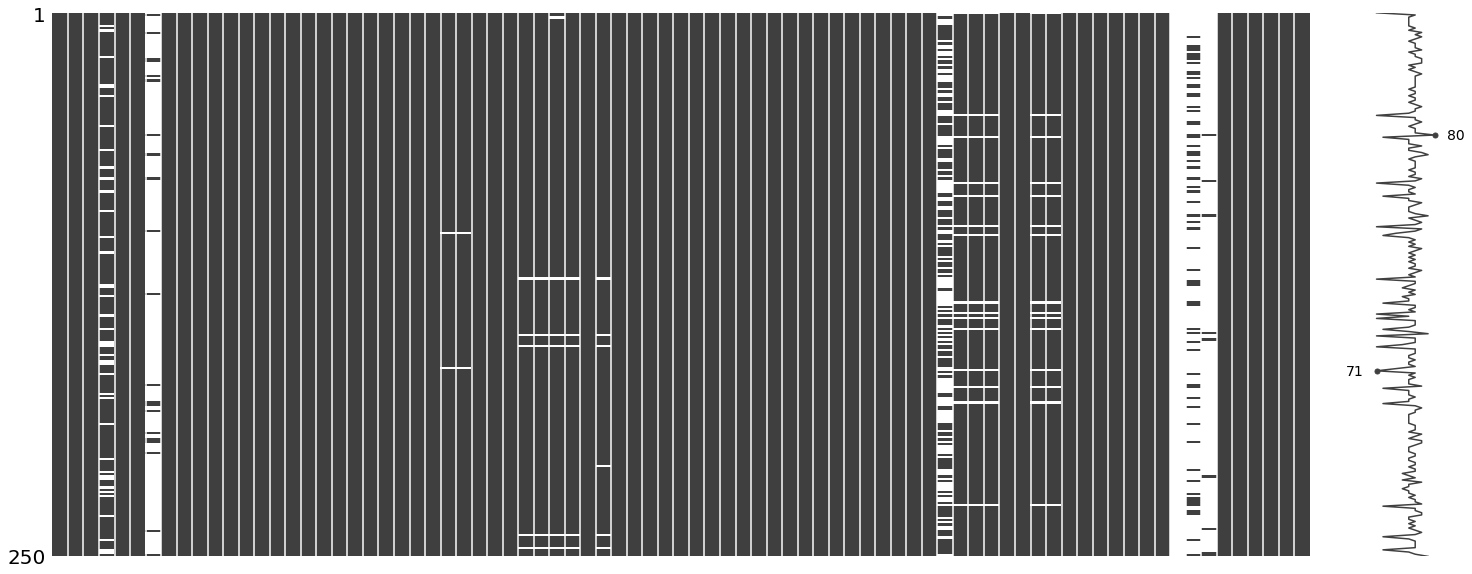

In [20]:
#Visualizing the missing data
msno.matrix(raw_data.sample(250))
plt.show()

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageCond      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Utilities       0.000000
dtype: float64

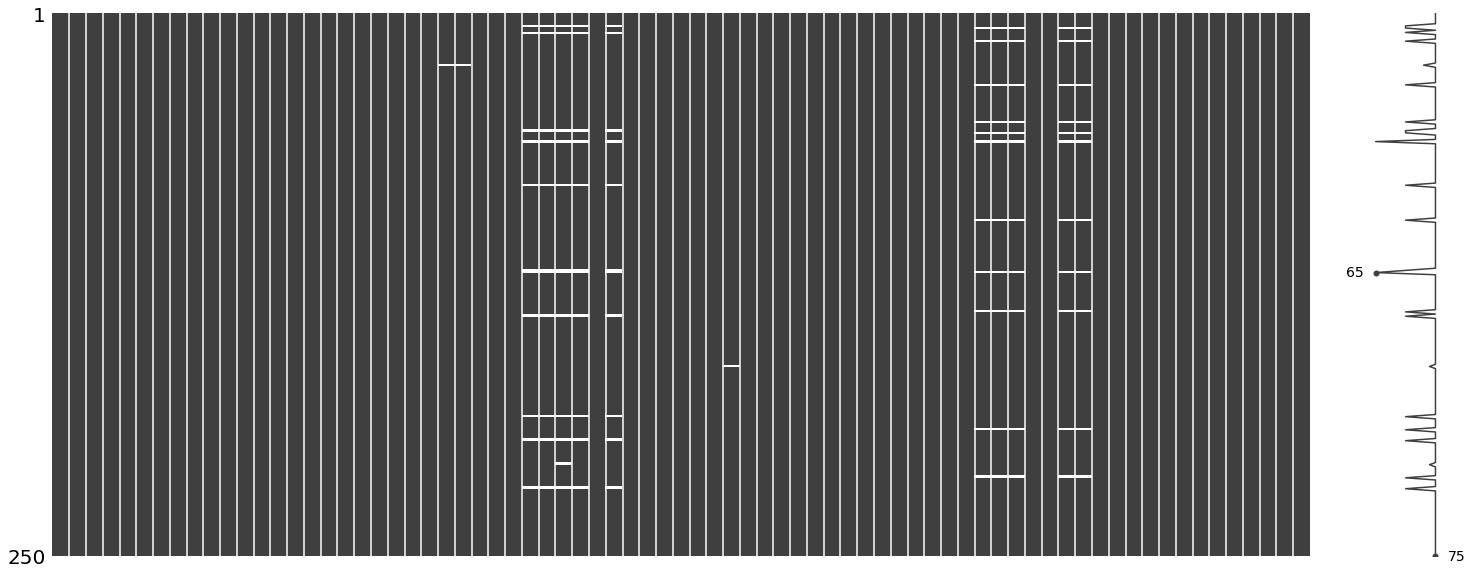

In [21]:
top_missing = raw_data.isnull().sum().sort_values(ascending=False).nlargest(20) 
missing_perc = top_missing / len(raw_data)
display(missing_perc)

#remove features with above 10 % missing
remove_cols = missing_perc[missing_perc > 0.1].index


pre_data =raw_data.drop(remove_cols,axis=1).copy()
msno.matrix(pre_data.sample(250))
plt.show()


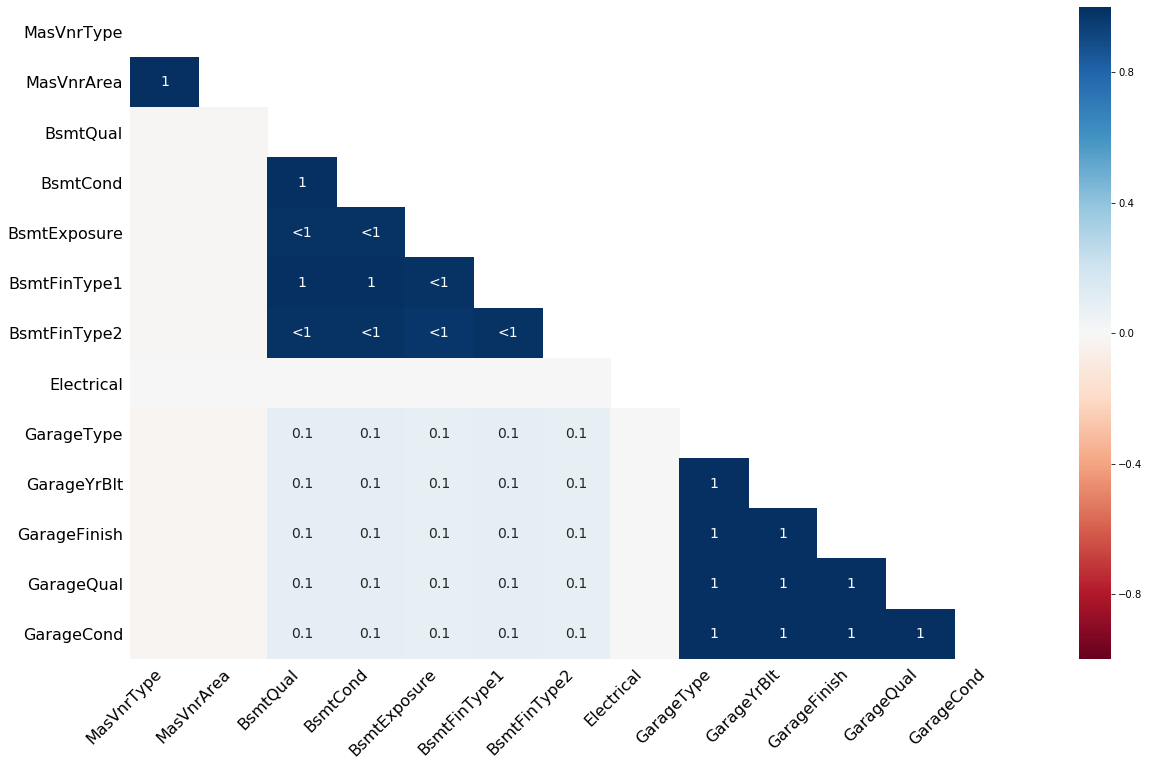

In [22]:
msno.heatmap(pre_data)

In [23]:
# Delete certain columns and decide what to do to the missing variables
# Normalize the numerical variables, and test for homoscedasticity


raw_data[['GarageYrBlt','YearBuilt']].corr()
#High Correlation - delete GarageYrBlt
pre_data.drop('GarageYrBlt',axis=1,inplace=True);

fill_dict = {'GarageType': 'NA', 'GarageFinish': 'NA', 'GarageQual': 'NA', 'GarageCond': 'NA'}
pre_data.fillna(value=fill_dict,inplace=True)

In [24]:
pre_data.fillna(value={'MasVnrArea':0},inplace=True)
columns = ['MasVnrType','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual']
pre_data[columns] = pre_data[columns].fillna(value='NA')
pre_data = pre_data.dropna()
pre_data.isnull().sum().sort_values(ascending=False).head(10)
#No NA Values

SalePrice       0
YearRemodAdd    0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
dtype: int64

In [25]:
main_features = ['SalePrice','OverallQual', 'GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
pre_data[main_features]

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
0,208500,7,1710,2,856,2,2003
1,181500,6,1262,2,1262,2,1976
2,223500,7,1786,2,920,2,2001
3,140000,7,1717,3,756,1,1915
4,250000,8,2198,3,1145,2,2000
...,...,...,...,...,...,...,...
1455,175000,6,1647,2,953,2,1999
1456,210000,6,2073,2,1542,2,1978
1457,266500,7,2340,1,1152,2,1941
1458,142125,5,1078,1,1078,1,1950


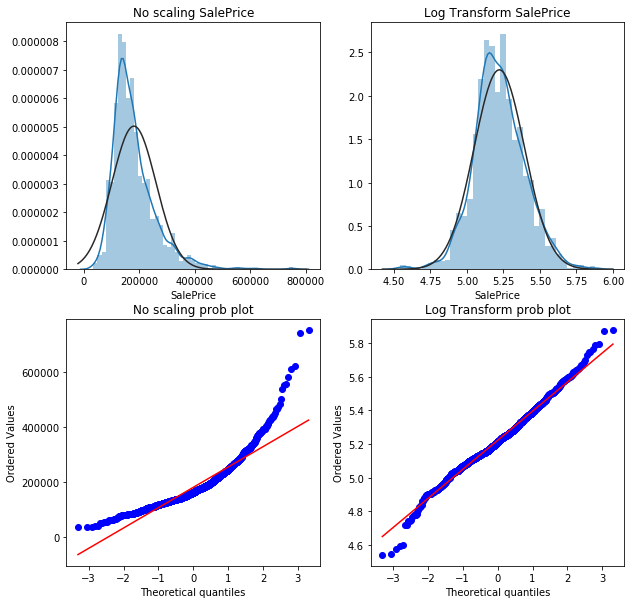

In [26]:
fig, axs = plt.subplots(2, 2,figsize=(10, 10))

sns.distplot(pre_data['SalePrice'],fit=stats.norm,ax=axs[0,0])
axs[0,0].set_title('No scaling SalePrice')

sns.distplot(np.log10(pre_data['SalePrice']),fit=stats.norm,ax=axs[0,1])
axs[0,1].set_title('Log Transform SalePrice')

stats.probplot((pre_data['SalePrice']), plot=axs[1,0])
axs[1,0].set_title('No scaling prob plot')

stats.probplot(np.log10(pre_data['SalePrice']), plot=axs[1,1])
axs[1,1].set_title('Log Transform prob plot')
plt.show()

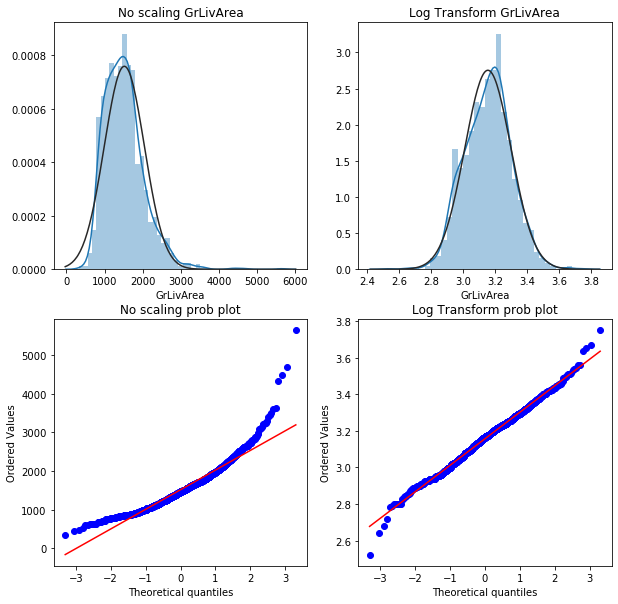

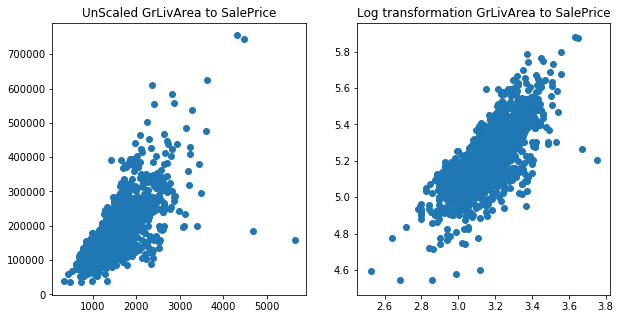

In [27]:
fig, axs = plt.subplots(2, 2,figsize=(10, 10))

sns.distplot(pre_data['GrLivArea'],fit=stats.norm,ax=axs[0,0])
axs[0,0].set_title('No scaling GrLivArea')

sns.distplot(np.log10(pre_data['GrLivArea']),fit=stats.norm,ax=axs[0,1])
axs[0,1].set_title('Log Transform GrLivArea')

stats.probplot((pre_data['GrLivArea']), plot=axs[1,0])
axs[1,0].set_title('No scaling prob plot')

stats.probplot(np.log10(pre_data['GrLivArea']), plot=axs[1,1])
axs[1,1].set_title('Log Transform prob plot')
plt.show()

fig, axs = plt.subplots(1,2,figsize=(10, 5))
axs[0].scatter(pre_data['GrLivArea'],pre_data['SalePrice'])
axs[0].set_title('UnScaled GrLivArea to SalePrice')
axs[1].scatter(np.log10(pre_data['GrLivArea']),np.log10(pre_data['SalePrice']))
axs[1].set_title('Log transformation GrLivArea to SalePrice')
plt.show()

,GrLivArea,SalePrice
523,4676,184750
691,4316,755000
1182,4476,745000
1298,5642,160000


,GrLivArea,SalePrice
691,4316,755000
1182,4476,745000


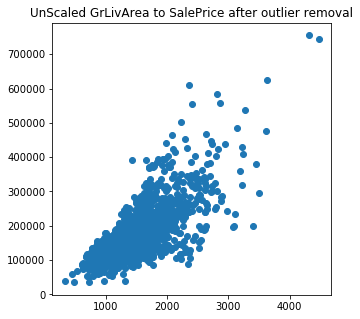

In [28]:
#Drop Outlier houses in GrLivArea
display(pre_data[['GrLivArea','SalePrice']][pre_data['GrLivArea']>4000])
outliers=[523,1298]
pre_data.drop(outliers,inplace=True)
display(pre_data[['GrLivArea','SalePrice']][pre_data['GrLivArea']>4000])
fig= plt.figure(figsize=(5, 5))
plt.scatter(pre_data['GrLivArea'],pre_data['SalePrice'])
plt.title('UnScaled GrLivArea to SalePrice after outlier removal')
plt.show()

In [29]:
pre_data['HasBmst']=(pre_data['TotalBsmtSF']>0).astype(int)
main_features.append('HasBmst')

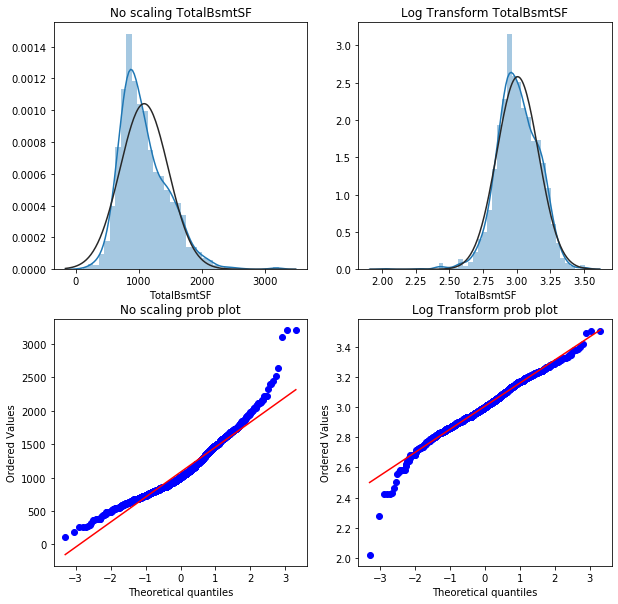

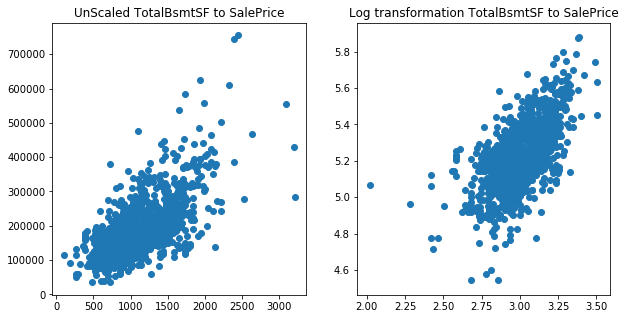

In [30]:
fig, axs = plt.subplots(2, 2,figsize=(10, 10))
non_zero = pre_data[pre_data['TotalBsmtSF']>0]
no_scaling = non_zero['TotalBsmtSF']
log_scaling = np.log10(no_scaling)


sns.distplot(no_scaling,fit=stats.norm,ax=axs[0,0])
axs[0,0].set_title('No scaling TotalBsmtSF')

sns.distplot(log_scaling,fit=stats.norm,ax=axs[0,1])
axs[0,1].set_title('Log Transform TotalBsmtSF')

stats.probplot(no_scaling, plot=axs[1,0])
axs[1,0].set_title('No scaling prob plot')

stats.probplot(log_scaling, plot=axs[1,1])
axs[1,1].set_title('Log Transform prob plot')
plt.show()

fig, axs = plt.subplots(1,2,figsize=(10, 5))

axs[0].scatter(non_zero['TotalBsmtSF'],non_zero['SalePrice'])
axs[0].set_title('UnScaled TotalBsmtSF to SalePrice')
axs[1].scatter(log_scaling,np.log10(non_zero['SalePrice']))
axs[1].set_title('Log transformation TotalBsmtSF to SalePrice')
plt.show()

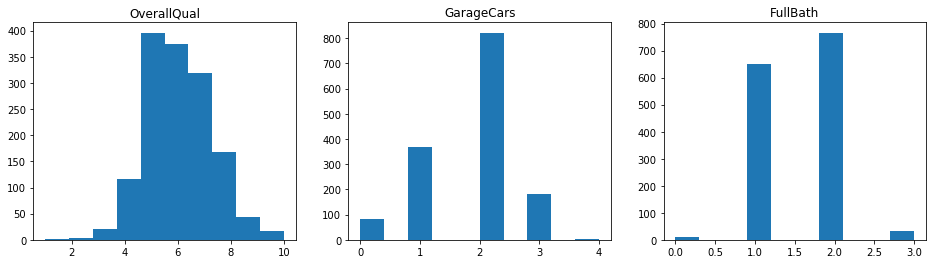

In [31]:
# pre_data[main_features]
fig, axs = plt.subplots(1, 3,figsize=(16, 4))
axs[0].hist(pre_data['OverallQual'])
axs[0].set_title('OverallQual')
axs[1].hist(pre_data['GarageCars'])
axs[1].set_title('GarageCars')
axs[2].hist(pre_data['FullBath'])
axs[2].set_title('FullBath')

plt.show()

In [32]:
feature_data = pre_data[main_features].copy()
feature_data.reset_index(inplace=True,drop=True)
# feature_data['SalePrice'] = np.log10(feature_data['SalePrice'])
feature_data['GrLivArea'] = np.log10(feature_data['GrLivArea'])
feature_data['TotalBsmtSF'] = np.log10(feature_data['TotalBsmtSF'][feature_data['TotalBsmtSF']>0])
feature_data['TotalBsmtSF'].fillna(0,inplace=True)

In [33]:
from sklearn import preprocessing

x = feature_data['YearBuilt'].values.reshape(-1, 1)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

feature_data['YearBuilt'] = pd.DataFrame(x_scaled).loc[:,0]

In [34]:
feature_data.isnull().sum()

SalePrice      0
OverallQual    0
GrLivArea      0
GarageCars     0
TotalBsmtSF    0
FullBath       0
YearBuilt      0
HasBmst        0
dtype: int64

In [37]:
# np.power(10,feature_data['SalePrice'])
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_log_error


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit

X = feature_data.drop(['SalePrice'],axis=1).values
y = feature_data.SalePrice.values



print('\nShuffle split')
ss = ShuffleSplit(n_splits=1, random_state=0, test_size=0.2, train_size=0.8)
avg_acc=[]
for train_index, test_index in ss.split(X):
    xTrain, yTrain = X[train_index] , y[train_index]
    xTest, yTest = X[test_index] , y[test_index]
    
    clf = LinearRegression().fit(xTrain, yTrain)
    train_predictions = clf.predict(xTest)
    display(train_predictions.min())
#     acc = np.sqrt(mean_squared_log_error(yTest, train_predictions))
#     avg_acc.append(acc)
#     print('Acc '+ str(round(acc,4)))
# print('\nAVG RMSE '+ str(round(np.mean(avg_acc),5)))


y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)


Shuffle split


-87078.88037868676

NameError: name 'lr' is not defined

In [ ]:
# https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset
# https://www.kaggle.com/neviadomski/how-to-get-to-top-25-with-simple-model-sklearn
# https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard